# Clifford Volume and Free-fermion Benchmark 
## TKET demnonstration


The following packages are required to run this tutorial:
- `pytket`
- `pytket-quantinuum`
- `pytket-qulacs`
- `qnexus`

Make sure these packages are installed in your Python environment.

If needed, you can install them via:
```bash
pip install pytket pytket-quantinuum qnexus pytket-qiskit pytket-qulacs

In [1]:
from ScalableVolumetricBenchmark import CliffordVolumeBenchmark, FreeFermionVolumeBenchmark

#quantinuum nexus
import qnexus as qnx

#tket
from pytket.qasm import circuit_from_qasm_str
from pytket.extensions.qulacs import QulacsBackend
from pytket.circuit import BasisOrder

## Create benchmark

In [2]:
#generate benchmark 

n_qubits = 5
sample_size = 4
shots = 2000

Clifford_benchmark = CliffordVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="tket",
    shots=shots,
    auto_save=False,
)
_ = Clifford_benchmark.create_benchmark()


FreeFermion_benchmark = FreeFermionVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="tket",
    shots=shots,
    auto_save=False,
)

_ = FreeFermion_benchmark.create_benchmark()


## Simulate circuits

In [3]:
# get all circuts 
Clifford_qasm = Clifford_benchmark.get_all_circuits()
Freefermion_qasm = FreeFermion_benchmark.get_all_circuits()

# transpile all circuits
Clifford_circuits = [circuit_from_qasm_str(qc) for qc in Clifford_qasm]
Freefermion_circuits = [circuit_from_qasm_str(qc) for qc in Freefermion_qasm]

In [4]:
backend = QulacsBackend() # use Qulacs to simulate

# compile circuits for the backend
Clifford_circuits = backend.get_compiled_circuits(Clifford_circuits, optimisation_level=2)
Freefermion_circuits = backend.get_compiled_circuits(Freefermion_circuits, optimisation_level=2)

In [5]:
# Run simulation and counts
Clifford_results = backend.run_circuits(Clifford_circuits, n_shots=1024)
Freefermion_results = backend.run_circuits(Freefermion_circuits, n_shots=1024)


# convert ticket Counter based format to dicts

Clifford_counts = []
for result in Clifford_results:
    count = dict(result.get_counts(basis=BasisOrder.ilo))

    new_count = {}
    
    for k in count.keys():
        new_count["".join(str(x) for x in k)] = count[k]
        
    Clifford_counts.append(new_count)

Freefermion_counts = []
for result in Freefermion_results:
    count = dict(result.get_counts(basis=BasisOrder.ilo))

    new_count = {}
    
    for k in count.keys():
        new_count["".join(str(x) for x in k)] = count[k]
        
    Freefermion_counts.append(new_count)


### Attach simulated results to the benchmark object

In [6]:
Clifford_benchmark.add_experimental_results(
    Clifford_counts,
    experiment_id="tket_qulacs_clifford_demo",
    platform="tket",
    experiment_metadata={"backend": "Qulacs"},
)


FreeFermion_benchmark.add_experimental_results(
    Freefermion_counts,
    experiment_id="tket_qulacs_freefermion_demo",
    platform="tket",
    experiment_metadata={"backend": "Qulacs"},
)


### Evaluate and plot benchmark


 Clifford Benchmark Evaluation (5 qubits)
Thresholds: τ_S = 1/e = 0.367879   τ_D = 1/(2e) = 0.183940
Shots per circuit: 2000
--------------------------------------------------------------
Stabilizers (all measured):
  • mean ± std: 1.000000 ± 0.000000
  • min EV:     1.000000
Destabilizers (all measured):
  • mean ± std: 0.001709 ± 0.027027
  • max |EV|:   0.085938
--------------------------------------------------------------
Per-sample pass count: 4/4
Worst stabilizer margin (min over samples of <S>-2σ): sample 0 -> 1.000000
Worst destabilizer margin (max over samples of |<D>|+2σ): sample 1 -> 0.130493
Benchmark passed (all samples): True



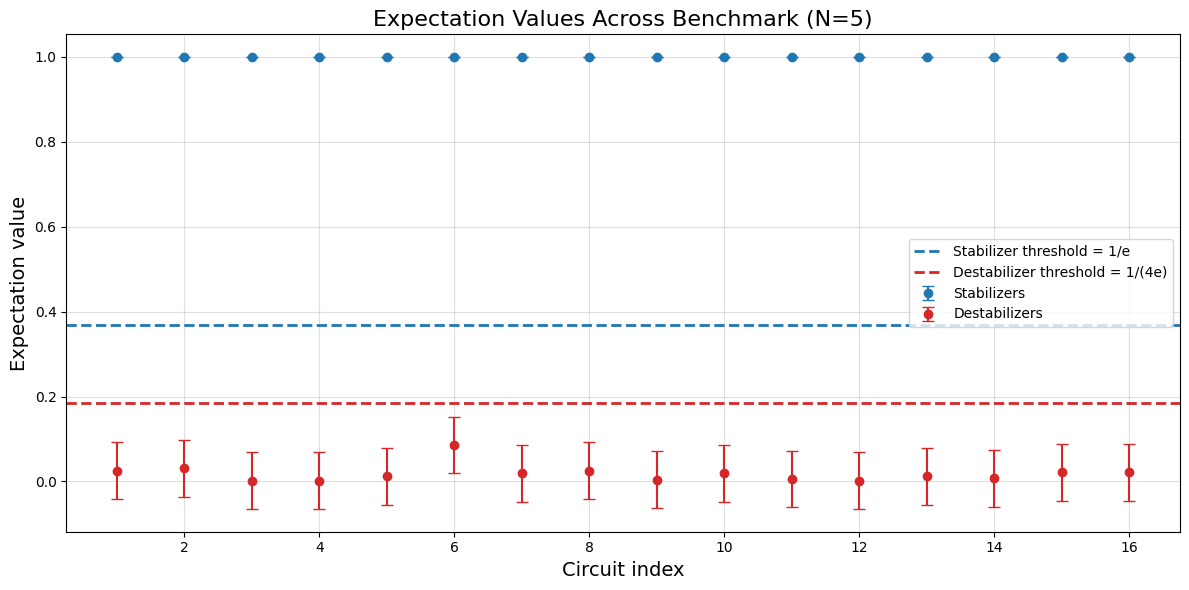

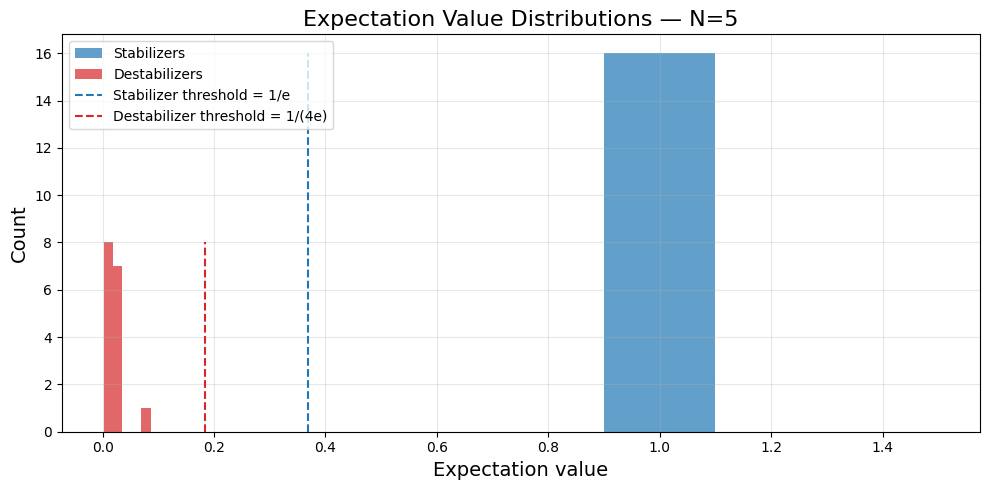

In [7]:
#Clifford Volume
evaluation = Clifford_benchmark.evaluate_benchmark()
Clifford_benchmark.plot_all_expectation_values()
Clifford_benchmark.plot_expectation_histograms(bins=5)


 Free-Fermion Benchmark Evaluation (5 qubits)

Parallel projected values (should be near 1):
  • average: 1.011133 ± 0.019772
  • lowest measured value: 0.982148

Orthogonal projected values (should be near 0):
  • average: 0.017836 ± 0.014539
  • highest absolute value: 0.039742


Benchmark passed: True



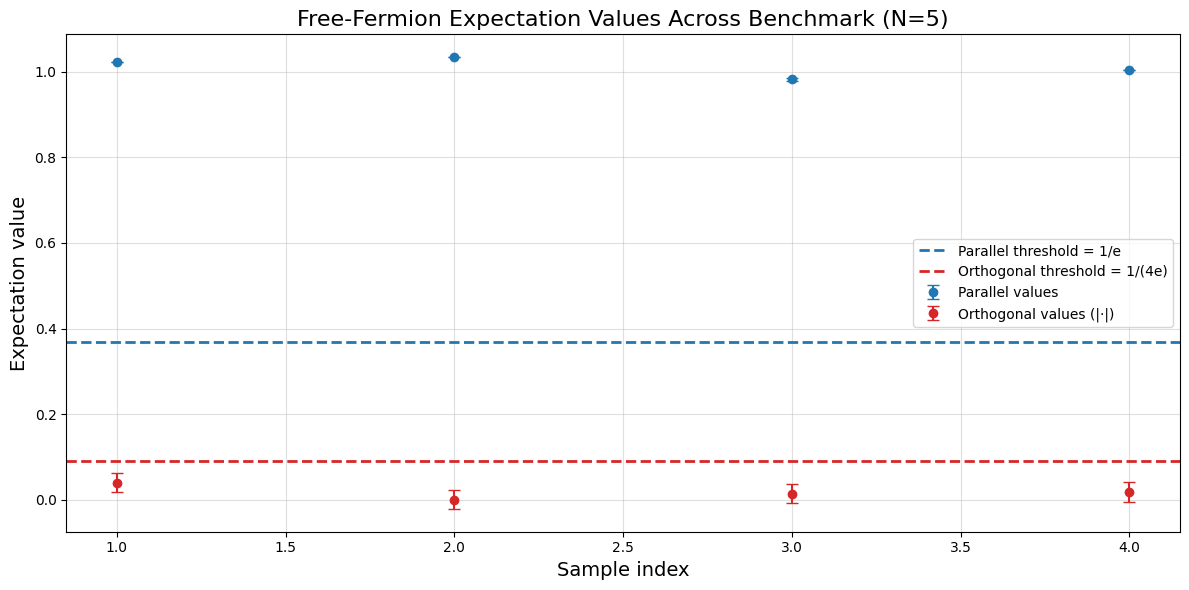

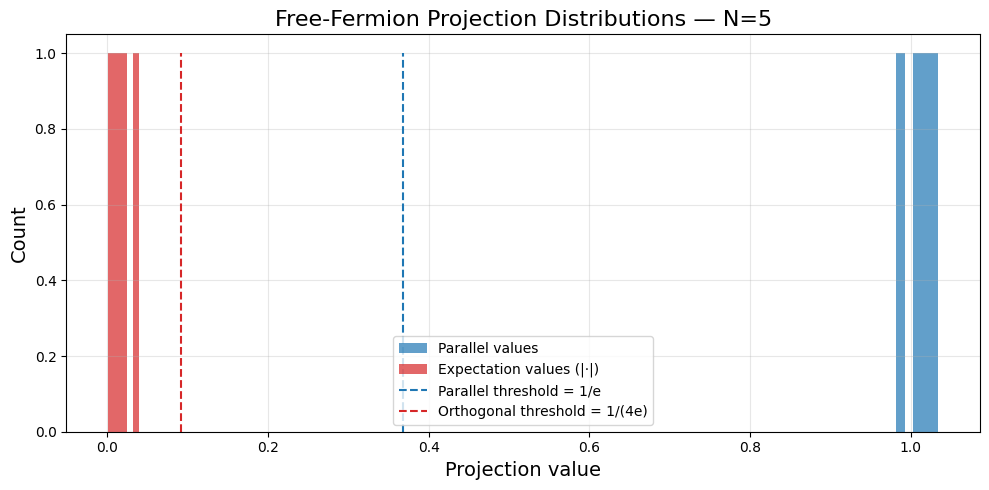

In [8]:
#Free-fermion Volume
evaluation = FreeFermion_benchmark.evaluate_benchmark()
FreeFermion_benchmark.plot_all_expectation_values()
FreeFermion_benchmark.plot_expectation_histograms(bins=5)

### Running on hosted emulators and real devices

> **Note**: To follow the next section of this tutorial, you will need valid credentials for Quantinuum Nexus.

In [61]:
# our workflows is defined as:
# creat benchmark -> generate circuits -> uplod to nexus -> compile circuits -> execute circuts 
#-> download rresults -> evaluate circuits

#generate benchmark 
n_qubits = 5
sample_size = 4
shots = 2000

Clifford_benchmark = CliffordVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="qiskit",
    shots=shots,
    auto_save=False,
)
_ = Clifford_benchmark.create_benchmark()


FreeFermion_benchmark = FreeFermionVolumeBenchmark(
    number_of_qubits=n_qubits,
    sample_size=sample_size,
    format="qasm2",
    target_sdk="qiskit",
    shots=shots,
    auto_save=False,
)

_ = FreeFermion_benchmark.create_benchmark()


In [62]:
#log into quantinuum nexus

qnx.login()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      yAcUBX                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://nexus.quantinuum.com/auth/device/browser?otp=yAcUBXwH5-h8UtYrx_JKABoA4YR9DhEzkUlb4-He62shwfN6xoa_0hnmM8I6QVrt9hoDdIob4lnnA_9H-rGk0A
✅ Successfully logged in as attilaportik13@gmail.com using the browser.


In [63]:
# creat a project

project = qnx.projects.get_or_create(name="Clifford and Free-fermion Volume Benchmark demo")
qnx.context.set_active_project(project)

In [65]:
# get circuits
Clifford_circuits = [circuit_from_qasm_str(qc,maxwidth=40) for qc in Clifford_benchmark.get_all_circuits()]
Freefermion_circuits = [circuit_from_qasm_str(qc,maxwidth=40) for qc in FreeFermion_benchmark.get_all_circuits()]

In [ ]:
# upload circuits 

Clifford_refs = [qnx.circuits.upload(circuit=Clifford_circuits,
                            project=project,  
                            name=Clifford_benchmark.benchmark_id + f"_{i}") for i, qc in enumerate(Clifford_circuits)]
# add the metadata to the benchmark object to log the name of the uploaded circuits
Clifford_circuits.benchmark_metadata['circuit refs'] = [str(r) for r in Clifford_refs]

Frefermion_refs = [qnx.circuits.upload(circuit=Freefermion_circuits,
                            project=project,  
                            name=Clifford_benchmark.benchmark_id + f"_{i}") for i, qc in enumerate(Freefermion_circuits)]

# add the metadata to the benchmark object to log the name of the uploaded circuits
FreeFermion_benchmark.benchmark_metadata['circuit refs'] = [str(r) for r in Frefermion_refs]


In [66]:
# define the backend for the compiling

config = qnx.QuantinuumConfig(device_name="H2-1")

In [ ]:
#Submit a compile job for all circuits
compile_job = qnx.start_compile_job(
    programs=Clifford_refs,
    backend_config=config,
    optimisation_level=3,
    name="compile_clifford_volume_circuits",
    project = project
)

clifford_compile_job_id = compile_job.id

compile_job = qnx.start_compile_job(
    programs=Frefermion_refs,
    backend_config=config,
    optimisation_level=3,
    name="free_fermion_volume_circuits",
    project = project
)

fermion_compile_job_id = compile_job.id

In [ ]:
# accses compiled circuits
job = qnx.client.jobs.get(id=clifford_compile_job_id)
compiled_refs = qnx.jobs.results(job)
clifford_circuit_refs = [compiled_ref.get_output() for compiled_ref in compiled_refs] 

# accses compiled circuits
job = qnx.client.jobs.get(id=freefermion_compile_job_id)
compiled_refs = qnx.jobs.results(job)
freefermion_circuit_refs = [compiled_ref.get_output() for compiled_ref in compiled_refs] 

In [ ]:
# define the backend 

machine = 'H2-1E'
backend_config = qnx.QuantinuumConfig(device_name=machine, noisy_simulation=True, simulator="stabilizer")

In [ ]:
# execute the benchmark circuits

execute_job_ref = qnx.start_execute_job(
    programs=clifford_circuit_refs,
    n_shots=[Clifford_benchmark.shots for _ in range(len(circuit_refs))],
    backend_config=backend_config,
    name="Clifford Volume",
    valid_check=False,
    project=project,
)
clifford_id = execute_job_ref.id

execute_job_ref = qnx.start_execute_job(
    programs=freefermion_circuit_refs,
    n_shots=[FreeFermion_benchmark.shots for _ in range(len(circuit_refs))],
    backend_config=backend_config,
    name="Clifford Volume",
    valid_check=False,
    project=project,
)

freefermion_id = execute_job_ref.id


In [ ]:
#retrive results

execute_job_result_refs = qnx.jobs.results(clifford_id)

Clifford_results = []
for i in range(len(execute_job_result_refs)):
    print(i)
    Clifford_results.append(execute_job_result_refs[i].download_result())


execute_job_result_refs = qnx.jobs.results(freefermion_id)
Freefermion_results = []
for i in range(len(execute_job_result_refs)):
    print(i)
    Freefermion_results.append(execute_job_result_refs[i].download_result())

# convert ticket Counter based format to dicts

Clifford_counts = []
for result in Clifford_results:
    count = dict(result.get_counts(basis=BasisOrder.ilo))

    new_count = {}
    
    for k in count.keys():
        new_count["".join(str(x) for x in k)] = count[k]
        
    Clifford_counts.append(new_count)

Freefermion_counts = []
for result in Freefermion_results:
    count = dict(result.get_counts(basis=BasisOrder.ilo))

    new_count = {}
    
    for k in count.keys():
        new_count["".join(str(x) for x in k)] = count[k]
        
    Freefermion_counts.append(new_count)

In [ ]:
Clifford_benchmark.add_experimental_results(
    Clifford_counts,
    experiment_id="tket_qulacs_clifford_demo",
    platform="tket",
    experiment_metadata={"backend": "Qulacs"},
)


FreeFermion_benchmark.add_experimental_results(
    Freefermion_counts,
    experiment_id="tket_qulacs_freefermion_demo",
    platform="tket",
    experiment_metadata={"backend": "Qulacs"},
)
